<a href="https://www.kaggle.com/code/fluloeo/sum-art?scriptVersionId=291057111" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [8]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import ast
import matplotlib.pyplot as plt

/kaggle/input/articles/df_dict_test.csv


In [9]:
!pip install -U bitsandbytes accelerate transformers -q
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import torch
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4"
)
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen3-4B-Instruct-2507")
model = AutoModelForCausalLM.from_pretrained(
    "Qwen/Qwen3-4B-Instruct-2507",
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True
)

torch.cuda.empty_cache()
!pip install langchain==0.0.208  -q
from langchain.text_splitter import RecursiveCharacterTextSplitter
!pip install rouge-score evaluate -q
from rouge_score import rouge_scorer
import evaluate
rouge = evaluate.load('rouge')

!pip install bert-score -q
from bert_score import BERTScorer

scorer = BERTScorer(lang="en", model_type="bert-base-multilingual-cased")

!pip install longdocfactscore -q
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
from longdocfactscore.ldfacts import LongDocFACTScore
ldfacts_scorer = LongDocFACTScore(device=device)
from tqdm.notebook import tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 33.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 123.2 MB/s eta 0:00:0000:010:01
cuda


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

2026-01-10 04:32:32.946348: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768019553.132947      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768019553.183372      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768019553.613293      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768019553.613320      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768019553.613323      55 computation_placer.cc:177] computation placer alr

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/99.6M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.1/155.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 112.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 96.9 MB/s eta 0:00:00:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.26.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
sigstore 4.1.0 requires pydantic<3,>=2, but you have pydantic 1.10.26 which is incompatible.
sigstore-models 0.0.5 requires pydantic>=2.11.7, but you have pyd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.3 MB/s eta 0:00:00


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

In [10]:
# !pip install -U deepeval

# # Настройка API-ключа (используйте Add-ons -> Secrets в Kaggle для безопасности)
# # import os
# # os.environ['OPENAI_API_KEY'] = ''  # Или используйте Secrets

In [11]:
# from deepeval import evaluate
# from deepeval.test_case import LLMTestCase
# from deepeval.metrics import SummarizationMetric
# from deepeval.metrics import GEval
# from deepeval.test_case import LLMTestCaseParams
# # Ваши данные: оригинал статьи и её сводка
# original_text = """Длинный текст вашей научной статьи здесь..."""
# generated_summary = """Сгенерированная моделью суммаризация здесь..."""

# # Создание тест-кейса и метрики
# test_case = LLMTestCase(input=original_text, actual_output=generated_summary)
# # Используйте assessment_questions для проверки конкретных аспектов
# metric = SummarizationMetric(
#     threshold=0.7,  # Порог успешного прохождения (0-1)
#     model="gpt-4o-mini",  # Модель-судья (можно изменить)
#     assessment_questions=[  # Пример вопросов для научной статьи
#         "Упомянута ли в сводке гипотеза исследования?",
#         "Описан ли использованный метод?",
#         "Приведены ли основные численные результаты?",
#         "Обсуждаются ли ограничения исследования?"
#     ],
#     include_reason=True  # Чтобы получить объяснение оценки
# )

# # Запуск оценки
# evaluate(test_cases=[test_case], metrics=[metric])
# # После выполнения можно вывести детали:
# print(f"Итоговый балл: {metric.score}")
# print(f"Причина: {metric.reason}")
# print(f"Детализация: Coverage={metric.score_breakdown['coverage_score']}, Alignment={metric.score_breakdown['alignment_score']}")



# # Определение кастомной метрики для научной суммаризации
# scientific_quality_metric = GEval(
#     name="Научная качественность",
#     criteria="""Оцени сводку научной статьи по следующим критериям:
#     1. **Точность**: Все факты, цифры и выводы точно соответствуют оригиналу.
#     2. **Полнота**: Отражены цель, методы, ключевые результаты и вывод.
#     3. **Ясность**: Логичная структура, понятный язык без жаргона.
#     4. **Значимость**: Выделены наиболее важные и новые аспекты исследования.""",
#     # Шаги рассуждения для модели-судьи (опционально, но повышает согласованность)
#     evaluation_steps=[
#         "Внимательно прочти оригинал статьи и сводку.",
#         "По пунктам проверь соответствие сводки критериям Точности, Полноты, Ясности и Значимости.",
#         "Присвой итоговый балл от 1 до 10, где 10 - идеальная сводка.",
#     ],
#     # Какие параметры тест-кейса использовать (original text = input, summary = actual_output)
#     evaluation_params=[LLMTestCaseParams.INPUT, LLMTestCaseParams.ACTUAL_OUTPUT],
#     model="gpt-4",  # Можно использовать более мощную модель для сложных оценок
#     threshold=0.7
# )

# # Создание тест-кейса и запуск оценки (также через evaluate или .measure())
# test_case = LLMTestCase(input=original_text, actual_output=generated_summary)
# scientific_quality_metric.measure(test_case)
# print(f"Балл: {scientific_quality_metric.score}")
# print(f"Обоснование оценки: {scientific_quality_metric.reason}")

In [12]:
def append_summary_to_file(final_summary, filename='all_summaries.txt', directory='/kaggle/working/'):
    """
    Добавляет текст final_summary в конец указанного файла.

    Параметры:
        final_summary (str): Текст сводки для добавления в файл.
        filename (str): Имя файла (по умолчанию 'all_summaries.txt').
        directory (str): Путь к папке для сохранения (по умолчанию рабочая директория Kaggle).
    """
    # Формируем полный путь к файлу
    filepath = directory + filename

    # Открываем файл в режиме добавления ('a') с кодировкой UTF-8
    # Режим 'a' создаст файл, если его нет, и допишет текст в конец, если он существует
    with open(filepath, 'a', encoding='utf-8') as file:
        # Записываем текст и добавляем перенос строки для разделения записей
        file.write(final_summary + '\n')

    print(f'Текст добавлен в файл: {filepath}')


    

In [13]:
df = pd.read_csv('/kaggle/input/articles/df_dict_test.csv')
df

,id,title,abstract,dict_test
0,1602.04402,balanced truncation of linear time-invariant s...,this paper discusses model order reduction of ...,{'I. INTRODUCTION AND PROBLEM FORMULATIONS': '...
1,1611.01462,tying word vectors and word classifiers: a los...,recurrent neural networks have been very succe...,"{'INTRODUCTION': ""Neural network models have r..."
2,1611.04496,multi-view recurrent neural acoustic word embe...,recent work has begun exploring neural acousti...,{'INTRODUCTION': 'Word embeddings-continuous-v...
3,1808.00560,compressible spectral mixture kernels with spa...,spectral mixture (sm) kernels comprise a power...,"{'Introduction': ""Gaussian processes (GPs) con..."
4,2111.00405,limitations of the macaulay matrix approach fo...,recently chen and gao~\cite{chengao2017} propo...,{'Introduction': 'Solving systems of multivari...
...,...,...,...,...
95,2307.14341,virtual mirrors: non-line-of-sight imaging bey...,non-line-of-sight (nlos) imaging methods are c...,{'Computed image of': 'T-shaped object from a ...
96,2307.14354,learned gridification for efficient point clou...,neural operations that rely on neighborhood in...,{'Introduction': 'Point clouds provide sparse ...
97,2307.14362,learnable wavelet neural networks for cosmolog...,convolutional neural networks (cnns) have been...,{'Introduction': 'The process of extracting in...
98,2307.14392,human-centric scene understanding for 3d large...,human-centric scene understanding is significa...,{'Introduction': 'Human-centric scene understa...


*Пример для одной статьи:*

статьи 12 8 7 имеют проблемы с большим количеством чанков


In [14]:
from typing import List

def get_token_length(text: str) -> int:
    return len(tokenizer.encode(text))

def merge_small_chunks_by_tokens(chunks: List[str], min_tokens: int) -> List[str]:
    """
    Объединяет чанки, если их длина в ТОКЕНАХ меньше min_tokens.
    Слияние происходит с наименьшим соседом (по количеству токенов).
    """
    processed_chunks = chunks[:]
    separator = " " # Разделитель при склейке
    
    i = 0
    while i < len(processed_chunks):
        current_chunk = processed_chunks[i]
        current_len = get_token_length(current_chunk)
        if current_len >= min_tokens:
            i += 1
            continue
        if len(processed_chunks) == 1:
            break
        if i > 0:
            left_len = get_token_length(processed_chunks[i-1])
        else:
            left_len = float('inf')

        if i < len(processed_chunks) - 1:
            right_len = get_token_length(processed_chunks[i+1])
        else:
            right_len = float('inf')
        if left_len < right_len:
            # print(f"DEBUG: Слияние '{processed_chunks[i][:20]}...' ВЛЕВО (Tokens: {current_len} + {left_len})")
            
            processed_chunks[i-1] = processed_chunks[i-1] + separator + processed_chunks[i]
            processed_chunks.pop(i)
            i -= 1 
        else:
            # print(f"DEBUG: Слияние '{processed_chunks[i][:20]}...' ВПРАВО (Tokens: {current_len} + {right_len})")
            processed_chunks[i] = processed_chunks[i] + separator + processed_chunks[i+1]
            processed_chunks.pop(i+1)
    return processed_chunks




In [15]:
def merge_chunks_in_dataset(df=df, min_tokens=100, n=100, n_threshold = 10):
    data = pd.DataFrame(columns=['chunks'])
    max_len_chunks = []
    max_size_chunks = []
    min_size_chunks = []
    for i in range(n):
        data_dict = ast.literal_eval(df['dict_test'].iloc[i])
        tokens_chunks_list_0 = list(map(lambda x: get_token_length(x), list(data_dict.values())))
        if len(tokens_chunks_list_0)>n_threshold or min(tokens_chunks_list_0)<min_tokens:
            final_chunks = merge_small_chunks_by_tokens(list(data_dict.values()), min_tokens=min_tokens)
            # print(f"\nКонечное количество чанков: {len(final_chunks)}\n")
            tokens_chunks_list = list(map(lambda x: get_token_length(x), final_chunks))
            # print('Максимальный размер чанка',max(tokens_chunks_list),'\n')
            max_len_chunks.append(len(final_chunks))
            max_size_chunks.append(max(tokens_chunks_list))
            min_size_chunks.append(min(tokens_chunks_list))
            data.loc[len(data)] = [final_chunks]
        else:
            print("Ничего не меняем, кол-во чанков, мин токенов", len(tokens_chunks_list_0),min(tokens_chunks_list_0))
            data.loc[len(data)] = [data_dict]
    print('Максимальное Кол-во чанков из всех статей\n',(max(max_len_chunks)))
    print('Минимальное Кол-во чанков из всех статей\n',(min(max_len_chunks)))
    print('Максимальный размер чанка из всех статей\n',max(max_size_chunks))
    print('Минимальный размер чанка из всех статей\n',min(min_size_chunks))
    return data
data = merge_chunks_in_dataset(df=df, min_tokens=700, n=20,n_threshold = 10)

Максимальное Кол-во чанков из всех статей
 14
Минимальное Кол-во чанков из всех статей
 5
Максимальный размер чанка из всех статей
 3331
Минимальный размер чанка из всех статей
 706


Функция для того чтобы отправить инструкцию модели

In [16]:
def qwen(article, prompt, max_tokens):
    torch.cuda.empty_cache()
    final_prompt = f"{prompt}:\n\n{article}"
    messages = [{"role": "user", "content": final_prompt}]
    model.eval()
    with torch.no_grad():
        inputs = tokenizer.apply_chat_template(
            messages,
            add_generation_prompt=True,
            tokenize=True,
            return_dict=True,
            return_tensors="pt",
            truncation=False
        ).to(model.device)
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_tokens,
            do_sample=False
        )
    final_summary = tokenizer.decode(outputs[0][inputs["input_ids"].shape[-1]:], skip_special_tokens=True)
    return final_summary

Функция для обработки чанков статьи, встроенный text_splitter можно отключить

In [17]:
def summarize(article, prompt_0, prompt_1,chunk_size=1500, max_tokens_0=700, max_tokens_1=700, text_splitter = True):
    torch.cuda.empty_cache()
    if text_splitter:
        text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
            tokenizer=tokenizer,
            chunk_size=chunk_size,
            chunk_overlap=chunk_size//20,
            separators=["\n\n", "\n", ". "],
            keep_separator=True
        )
        article_chunks = text_splitter.split_text(article)
    else:
        article_chunks = article
    summaries = []
    for i, chunk in tqdm(enumerate(article_chunks), total=len(article_chunks)):
        try:
            chunk_summary = qwen(article=chunk, prompt=prompt_0, max_tokens=max_tokens_0)
            # print(f"\nSummary chunk number {i}")
            # print(chunk_summary)
        except torch.cuda.OutOfMemoryError as e:
            print(f"⚠️ Ошибка нехватки памяти CUDA, слишком длинный чанк: {str(e)[:100]}...")
            return 'ERROR'

        summaries.append(chunk_summary)
        torch.cuda.empty_cache()
    combined_summary = "\n".join(summaries)
    
    try:
        final_summary = qwen(article=combined_summary, prompt=prompt_1, max_tokens=max_tokens_1)
    except torch.cuda.OutOfMemoryError as e:
        print(f"⚠️ Ошибка нехватки памяти CUDA при итоговой суммаризации: {str(e)[:100]}...")
        return 'ERROR'
    return final_summary

In [18]:
rouge_list = []
bert_list = []
ldfacts_list = []
summaries_list = []

def to_full_text(data_dict):
    text = ''
    for key, value in data_dict.items(): 
        text += f"{key}\n\n{value}\n\n"
    return text


for i in range(20):
    print(f"\n=== Статья {i} ===")
    #извлекаем чанки, абстракт, названия разделов
    article_dict = ast.literal_eval(df['dict_test'].iloc[i]) #словарь для i-той статьи 
    chunked_article = data['chunks'].iloc[i] #list(article_dict.values()) #список чанков !!!!ВАЖНО я поменял на новый list 
    # chapters_list = list(article_dict.keys()) #список глав
    # print('Список разделов')
    # display(pd.DataFrame(chapters_list))
    abstract = df['abstract'].iloc[i] 
    article = to_full_text(article_dict) #полный текст статьи с ключами и значениями словаря
    
    print(f"Токенов в статье: {len(tokenizer.encode('\n'.join(chunked_article)))}")
    prompt_0 = "You're a science editor. Briefly summarize this fragment of the scientific text in original language. Do not add information that is not in the source texts.Try to answer in 350 words. Your answer should be perfect. Do not add information that is not in the source texts"
    prompt_1 = "You're a science editor. Based on the following summaries of the parts of the article, create a single, coherent and concise summary of the entire scientific article in original language, highlighting the common goal, methods, key results and conclusion. Try to answer with a length of 600 to 650 words. Your answer should be perfect. Do not add information that is not in the source texts"
    
    summary_full = summarize(chunked_article, prompt_0 = prompt_0, prompt_1 = prompt_1, max_tokens_0 = 400, max_tokens_1 = 700, text_splitter = False)
    print(f'\nSummary article number {i}')
    print(f"Токенов в summary: {len(tokenizer.encode(summary_full))}")
    print(summary_full)
    summaries_list.append({
        'article_id': i,
        'original_text': article,
        'abstract': abstract,
        'summary': summary_full
    })
    append_summary_to_file(f"--- Summury #{i} ---")
    append_summary_to_file(summary_full)
    append_summary_to_file("")
    
    results = rouge.compute(
    predictions=[summary_full],
    references=[article],
    use_stemmer=True
    )
    print("ROUGE Metrics:")

    rouge_dict = {}
    for key, value in results.items():
        print(f"{key}: {value:.4f}")
        rouge_dict[key] = value
    rouge_list.append(rouge_dict)

    _, _, F1 = scorer.score([summary_full], [abstract])
    bert_f1 = F1.item()
    print(f"\nBERTScore: F1 = {bert_f1:.4f}")
    bert_list.append(bert_f1)

    ldfacts_sum = ldfacts_scorer.score_src_hyp_long([article], [summary_full])
    ldfacts_abs = ldfacts_scorer.score_src_hyp_long([article], [abstract])
    print(f"LongDocFACTScore for sum: {ldfacts_sum[0]}")
    print(f"LongDocFACTScore for abstract: {ldfacts_abs[0]}")
    ldfacts_list.append({
        'for_summary': ldfacts_sum[0],
        'for_abstract': ldfacts_abs[0]
    })


=== Статья 0 ===
Токенов в статье: 6901


  0%|          | 0/5 [00:00<?, ?it/s]

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



Summary article number 0
Токенов в summary: 511
This article addresses the challenge of model order reduction (MOR) for linear time-invariant continuous-time systems with large order, where computational and storage demands hinder practical simulation and design. While standard balanced truncation (FIBT) preserves stability and offers a priori error bounds over the entire frequency range, it is suboptimal when input signals operate within a finite frequency interval [ω₁, ω₂]. To improve in-band approximation performance, several balancing-related methods are analyzed: singular perturbation approximation (SPA), frequency-weighted balanced truncation (FWBT), and frequency-limited Grammians balanced truncation (FGBT). However, these methods either lack error bounds for finite intervals, require iterative design, or fail due to non-positive semi-definite Grammians. A key observation is that existing methods evaluate performance using entire-frequency indices, despite the finite-frequency 

  0%|          | 0/5 [00:00<?, ?it/s]


Summary article number 1
Токенов в summary: 552
This article proposes a novel loss framework and architectural improvement for recurrent neural network language models (RNNLMs) aimed at addressing two fundamental limitations in existing models: the lack of a defined metric space for output classes and the isolation of input and output representations. The authors introduce an augmented loss function that extends classical cross-entropy by incorporating a term minimizing the Kullback-Leibler (KL) divergence between model predictions and a target distribution derived from word embedding similarities. This target distribution, estimated via softmax over inner products of word embeddings normalized by temperature τ, reflects semantic proximity rather than one-hot labels, thereby leveraging the natural geometric structure of word embeddings. The framework further introduces a synergistic architectural improvement by tying the input and output embedding matrices together—specifically, by se

  0%|          | 0/5 [00:00<?, ?it/s]


Summary article number 2
Токенов в summary: 600
This paper proposes a multi-view learning framework for acoustic and orthographic word embeddings that jointly captures pronunciation and spelling information. The goal is to learn shared, low-dimensional vector representations of words such that acoustic and character sequences of the same word are close in embedding space, while those of different words are separated. Unlike prior single-view methods—such as DTW-based or autoencoder-based approaches—the proposed method jointly learns embeddings from both audio (MFCCs with first and second derivatives) and character sequences using bidirectional long-short term memory (LSTM) networks. Each view is processed by stacked bidirectional LSTMs, with intermediate layer outputs concatenated and final outputs combined into 1024-dimensional embeddings used to compute cosine distances. The model employs four contrastive losses: fixed-margin losses based on matched pair distances and edit distances

  0%|          | 0/8 [00:00<?, ?it/s]


Summary article number 3
Токенов в summary: 541
This paper proposes a novel structured stationary kernel (SMD kernel) that generalizes the classical spectral mixture (SM) kernel by explicitly modeling inter-component dependencies and incorporating time-phase delays. The core goal is to overcome the limitations of existing SM variants—such as SMP, NSM, and GSM—which assume independence among spectral components and fail to capture meaningful cross-component interactions. The authors introduce a dependency structure via a complex-valued Gaussian mixture model, where cross-covariances between components are derived from the Fourier domain using Bienaymé’s identity, ensuring the resulting kernel remains positive definite. A key innovation is the use of time and phase delays (TP delays) to model temporal interference between frequency components, captured through complex exponential modulation in the spectral density. This enables a more accurate representation of real-world signals with d

  0%|          | 0/8 [00:00<?, ?it/s]


Summary article number 4
Токенов в summary: 570
The article addresses the problem of solving systems of multivariate polynomial equations over \( \mathbb{F}_2 \), which is known to be NP-complete. The central goal is to analyze the computational complexity of quantum algorithms that solve such systems via the HHL quantum linear system (QLS) approach, specifically by linearizing the polynomial system into a large sparse linear system using the Macaulay matrix. The authors demonstrate that while the HHL algorithm can efficiently prepare the linear system and extract solutions through a generalized quantum coupon collector, its practicality is limited by a fundamental issue: the condition number \( \kappa \) of the Macaulay matrix. They prove an exponential lower bound on \( \kappa \), specifically \( \kappa_{\vec{b}}(M) \geq \frac{1}{2}(2^h - 1) \), where \( h \) is the Hamming weight of the solution. This implies that the HHL-based quantum algorithm requires time \( \Omega(\kappa) \), 

  0%|          | 0/7 [00:00<?, ?it/s]


Summary article number 5
Токенов в summary: 658
This submission to the SIMMC 2.0 challenge presents a conversational agent designed to assist in shopping by interpreting task-oriented dialogues grounded in immersive visual scenes, focusing on disambiguation and coreference resolution as key sub-tasks. The primary goal is to enable accurate interpretation of user intent and object references in real-world, multi-modal dialogues. The authors develop two transformer-based models: one for disambiguation prediction using a TOD-BERT variant, and another for coreference resolution leveraging an LXMERT encoder with dialogue and visual context. The dataset comprises 11,244 dialogues in fashion and furniture domains, collected via self-play and human annotation, split into train/dev/devtest/test-std (65%/5%/15%/15%), with final performance evaluated on the unseen test-std split.

For disambiguation (Sub-Task #1), the model predicts whether clarification is needed in a user utterance based on di

  0%|          | 0/10 [00:00<?, ?it/s]


Summary article number 6
Токенов в summary: 534
This study presents MICDIR, a novel unsupervised deep learning method for deformable image registration in 3D brain MRI, aiming to improve both intramodal (e.g., T1w to T1w) and intermodal (e.g., T1w to T2w) registration by integrating structural brain connectivity and accommodating large deformations. The common goal is to achieve accurate, fast, and robust image alignment without manual annotations or supervised training data. The method leverages a multi-scale UNet architecture (MSCGUNet) with a self-constructing graph network (SCGNet) to encode global anatomical semantics and capture both small and large deformations. The network processes fixed and moving images, concatenates them, and predicts dense displacement vector fields (DVF) via a spatial transformer. A multi-scale design enables deep supervision at original and downsampled resolutions, improving gradient flow and stability during training. The SCGNet dynamically constructs 

  0%|          | 0/13 [00:00<?, ?it/s]


Summary article number 7
Токенов в summary: 536
This tutorial provides a comprehensive overview of the application of Transformer architectures in time-series analysis, focusing on their structural foundations, methodological adaptations, and performance advantages over traditional models. The core goal is to enable efficient, accurate, and scalable forecasting and classification of time-series data—such as stock prices, sensor readings, and biomedical signals—by leveraging the parallelizable self-attention mechanism that overcomes the limitations of recurrent models like RNNs, LSTMs, and GRUs, which suffer from vanishing gradients and poor parallelization.

The original Transformer architecture, introduced by Vaswani et al., relies on self-attention, scaled dot-product attention, multi-head attention, and sinusoidal positional encoding to preserve sequence order and enable parallel computation. Input sequences are embedded into vectors, with positional encoding—using sinusoidal funct

  0%|          | 0/13 [00:00<?, ?it/s]


Summary article number 8
Токенов в summary: 662
The article presents BASALISC, a hardware accelerator for Fully Homomorphic Encryption (FHE) based on the BGV scheme, designed to enable efficient, high-performance homomorphic computation. The common goal is to overcome the computational and noise management challenges in FHE, particularly the high cost of bootstrapping and the need for scalable, low-latency operations. The BGV scheme operates in the ring \( R = \mathbb{Z}[X]/(X^N + 1) \), with plaintexts in \( R_t \) and ciphertexts in \( R_{2q} \), where noise accumulation limits operation depth. To manage noise, key switching and modulus switching are used, while bootstrapping restores noise via homomorphic decryption. The core challenge lies in reducing computational overhead and memory footprint, especially during multiplication and permutation operations, which dominate execution time and data movement.

BASALISC accelerates five fundamental operations—addition, multiplication, pe

  0%|          | 0/6 [00:00<?, ?it/s]


Summary article number 9
Токенов в summary: 700
The article presents a comprehensive analysis of existing ternary logic circuit designs, with a focus on identifying and evaluating efficient, scalable, and power-optimized architectures. The primary goal is to identify and refine ternary adder and full-adder (TFA) designs that minimize transistor count, reduce power dissipation, and eliminate voltage division—common sources of power loss and performance degradation. The authors begin by reviewing 84 existing TFA designs, then systematically eliminate non-competitive categories: non-transistor-based circuits, multi-VDD designs, balanced ternary designs with −VDD requirements, CML designs due to high power consumption, RTL and pseudo-NMOS due to poor power efficiency, CTL due to noise sensitivity, and dynamic logic due to clock dependency. After filtering, 25 designs remain, with further reduction to 11 unique, non-redundant designs focused on single-VDD, static, full-swing operation. The

  0%|          | 0/7 [00:00<?, ?it/s]


Summary article number 10
Токенов в summary: 505
The AudioLM framework presents a hierarchical, hybrid tokenization approach to audio generation that simultaneously enables high-fidelity audio synthesis and long-term linguistic coherence. The core goal is to achieve both high-quality audio reconstruction and semantic consistency in speech and music, by disentangling acoustic and semantic content through a two-stage tokenization scheme. Input audio sequences are first tokenized into acoustic tokens via SoundStream, a neural codec that downsamples at 16 kHz to 50 Hz with residual vector quantization (RVQ), achieving a bitrate of 2000 bps and preserving waveform fidelity. Concurrently, semantic tokens are derived from the 7th layer of w2v-BERT using k-means clustering (K=1024), capturing linguistic structure with strong phonetic discriminability (low ABX error) but poor reconstruction quality. These two token types are combined in a three-stage autoregressive Transformer architecture: se

  0%|          | 0/9 [00:00<?, ?it/s]


Summary article number 11
Токенов в summary: 551
The article presents LIBRO, a novel framework that leverages large language models (LLMs) to generate and filter bug-reproducing test cases directly from natural language bug reports. The core goal is to address the underexplored problem of report-to-test generation—where bug reports are frequently used to create tests for debugging—by enabling automated, reliable test generation without requiring crash traces or prior test suites. The authors argue that such generation is both prevalent and essential, as analysis of 300 open-source Java projects shows that 28.4% of test additions are tied to issue-linked commits, indicating real-world relevance. Despite this, prior work focuses narrowly on crash reproduction or specific cases, missing the broader need for semantic bug validation.

LIBRO uses pretrained LLMs (e.g., OpenAI Codex) to generate test methods from bug reports via carefully engineered prompts, including instructions and code s

  0%|          | 0/14 [00:00<?, ?it/s]


Summary article number 12
Токенов в summary: 483
The paper addresses the long-standing challenge of proving convergence of iterative methods in parameter identification for partial differential equations (PDEs) based on boundary measurements, by establishing a general framework for range invariance of the linearized forward operator—without requiring restrictive nonlinearities or full observation. The central goal is to ensure convergence of regularization methods, such as Newton-type iterations, under practical conditions relevant to inverse problems in tomography and nondestructive testing. The authors introduce a condition of range invariance of the derivative \( F' \), which is independent of the observation operator \( C \) and thus directly applicable to boundary data. This condition is shown to be equivalent to the boundedness and bounded invertibility of the operator \( F'(x)^{-1}F'(x) \) in a neighborhood of the exact solution, and can be rephrased via a bounded invertible op

  0%|          | 0/10 [00:00<?, ?it/s]


Summary article number 13
Токенов в summary: 558
The paper presents a novel hybrid automaton (HA)-learning algorithm that infers hybrid systems from input-output trajectories by modeling both continuous dynamics and discrete mode transitions. The core goal is to learn a hybrid automaton (HA) that captures the system’s behavior, including distinct continuous dynamics in each location, nonlinear ordinary differential equations (ODEs), and both exogenous and endogenous transitions—features absent in prior methods. The algorithm operates offline and passively, without requiring system interaction or external intervention. It begins by segmenting trajectories into continuous dynamics segments using backward and forward backward differentiation formulas (BDF) to detect discontinuities in derivatives, identifying change points where derivative jumps occur. These segments are then clustered based on shape similarity using dynamic time warping (DTW), with clustering guided by DTW distance and 

  0%|          | 0/5 [00:00<?, ?it/s]


Summary article number 14
Токенов в summary: 604
This article addresses the challenge of real-time video super-resolution (VSR) in adaptive online streaming, where dynamic degradations caused by fluctuating bandwidth and variable quantization parameters (QP) severely degrade video quality. Unlike traditional static super-resolution methods, online streaming VSR must operate under strict latency and inference speed constraints, while adapting to unpredictable low-bitrate conditions. Existing approaches—particularly LUT-based methods—struggle due to fixed mappings and limited adaptability to dynamic degradations, while deep learning models like CNNs suffer from high computational cost and latency. To bridge this gap, the authors propose a novel framework based on *grouped expert Look-Up Tables (LUTs)*, designed specifically for real-time streaming environments.

The method introduces a set of expert LUTs, each trained on representative static degradations (defined by QP values) and spec

  0%|          | 0/6 [00:00<?, ?it/s]


Summary article number 15
Токенов в summary: 506
This study presents a kinodynamics-based pose optimization framework integrated with real-time model predictive control (MPC) for humanoid robots performing dynamic pushing tasks. The central goal is to enable autonomous, stable, and robust whole-body pushing of large, heavy, and ungraspable objects by mimicking human behavior—such as leaning forward, lowering the center of mass, and shifting feet backward—to enhance stability and force generation. Unlike prior methods that rely on trajectory optimization or neglect object-robot dynamics, the proposed approach explicitly incorporates object-robot interactions, kinematic constraints, and physical properties like friction and mass in a single, task-specific whole-body pose. The method formulates an optimal pushing pose—defined by body Euler angles and joint configurations—as a nonlinear programming (NLP) problem, solving for a static, single-configuration solution that avoids the computat

  0%|          | 0/6 [00:00<?, ?it/s]


Summary article number 16
Токенов в summary: 588
The article proposes SwiftFormer, a novel hybrid vision architecture designed for efficient, real-time mobile deployment, addressing the long-standing trade-off between accuracy and computational efficiency in mobile vision models. The core goal is to enable effective global context modeling on mobile devices without the high latency and memory overhead of traditional self-attention mechanisms. Existing transformer-based models, though accurate, suffer from quadratic computational complexity (O(n²d)) due to dot-product operations in multi-head self-attention (MHSA), making them impractical for mobile inference. In contrast, convolutional neural networks (CNNs) offer speed and efficiency but struggle with long-range dependencies and local connectivity. Hybrid architectures attempt to bridge this gap by combining CNNs with self-attention in later stages, yet remain limited by the computational cost and stage-specific application of MHSA.


  0%|          | 0/9 [00:00<?, ?it/s]


Summary article number 17
Токенов в summary: 537
This study identifies a novel class of attacks that exploit imperceptible text encoding variations to manipulate search engine results and downstream AI systems, posing a significant threat to information integrity. The core goal is to demonstrate how adversaries can deceive search engines—both commercial (e.g., Google, Bing) and open-source (e.g., Elasticsearch)—by introducing subtle, visually undetectable perturbations in text encoding, without altering the visible content. These perturbations—such as invisible characters (e.g., Zero Width Space), homoglyphs (e.g., Latin H vs. Cyrillic Н), reordering (e.g., Right-to-Left Override), and deletions—produce identical rendered text but differ in binary encoding. By exploiting the lack of cross-representation awareness in text processing pipelines, adversaries can either hide malicious content from standard searches (hiding potential) or push false content into results (surfacing potential)

  0%|          | 0/9 [00:00<?, ?it/s]


Summary article number 18
Токенов в summary: 522
This article presents VoxTracer, a novel traceable voice conversion (VC) framework designed to enable robust speaker identity recovery from degraded, compressed, or processed speech—addressing critical gaps in current VC systems where source traceability is absent. The core goal is to enable reliable source speaker identification and original speech restoration in voice conversion, countering misuse such as deepfake fraud, reputational harm, and financial manipulation. Unlike traditional audio watermarking, which embeds fragile, error-prone signals and fails under compression or processing, VoxTracer integrates speaker identity imperceptibly into the VC process using speaker embeddings and a VAE-Glow architecture. It operates in four stages: voice conversion, identity hiding, transmission, and tracing. During hiding, a speaker embedding is encoded into a Gaussian-distributed latent code via a VAE encoder and embedded into the speech gen

  0%|          | 0/9 [00:00<?, ?it/s]


Summary article number 19
Токенов в summary: 621
The article presents TriMLP, a novel sequential recommendation model that addresses the fundamental incompatibility between fully-connected MLP architectures and auto-regressive training paradigms. While recent all-MLP models like MLP-Mixer and ResMLP have gained popularity for their computational efficiency, empirical evaluations on 12 public datasets—including Beauty, Sports, MovieLens, and LBSN benchmarks—reveal that standard MLPs underperform significantly, lagging NextItNet by up to 28.19% in HR@10. This degradation is attributed to the fully-connected design enabling antichronological interactions (future-to-past), which violates the autoregressive training principle where tokens should only attend to themselves and previous interactions. The authors demonstrate that MLPs are insensitive to sequence order, confirming their inability to model chronological user preferences effectively.

To resolve this, TriMLP introduces a triangul

In [19]:
print("\n--- ROUGE Metrics (средние значения) ---")
for key in rouge_list[0].keys():
    avg = sum(r[key] for r in rouge_list) / len(rouge_list)
    print(f"{key}: {avg:.4f}")

avg_bert = sum(bert_list) / len(bert_list)
print(f"\n--- BERTScore F1 (среднее): {avg_bert:.4f} ---")

avg_sum = sum(l['for_summary'] for l in ldfacts_list) / len(ldfacts_list)
avg_abs = sum(l['for_abstract'] for l in ldfacts_list) / len(ldfacts_list)

print(f"\n--- LongDocFACTScore (средние) ---")
print(f"Для суммаризаций: {avg_sum:.4f}")
print(f"Для абстрактов: {avg_abs:.4f}")


--- ROUGE Metrics (средние значения) ---
rouge1: 0.1151
rouge2: 0.0510
rougeL: 0.0641
rougeLsum: 0.0965

--- BERTScore F1 (среднее): 0.6845 ---

--- LongDocFACTScore (средние) ---
Для суммаризаций: -4.6309
Для абстрактов: -4.7052


*С text_splitter:*

я забыл сохранить переменную summaries_list прежде чем запустить следующую ячейку :))))))

In [ ]:
rouge_list = []
bert_list = []
ldfacts_list = []
summaries_list = []

for i in range(5):
    print(f"\n=== Статья {i} ===")
    #извлекаем чанки, абстракт, названия разделов
    article_dict = ast.literal_eval(df['dict_test'].iloc[i]) #словарь для i-той статьи 
    chunked_article = list(article_dict.values()) #список чанков
    # chapters_list = list(article_dict.keys()) #список глав
    # print('Список разделов')
    # display(pd.DataFrame(chapters_list))
    abstract = df['abstract'].iloc[i] 
    article = to_full_text(article_dict) #полный текст статьи с ключами и значениями словаря
    
    print(f"Токенов в статье: {len(tokenizer.encode('\n'.join(chunked_article)))}")
    prompt_0 = "You're a science editor. Briefly summarize this fragment of the scientific text in original language. Do not add information that is not in the source texts"
    prompt_1 = "You're a science editor. Based on the following summaries of the parts of the article, create a single, coherent and concise summary of the entire scientific article in original language, highlighting the common goal, methods, key results and conclusion. Do not add information that is not in the source texts"
    
    summary_full = summarize(article, prompt_0 = prompt_0, prompt_1 = prompt_1,chunk_size = 1500, max_tokens_0 = 500, max_tokens_1 = 700, text_splitter = True)
    print(f'\nSummary article number {i}')
    print(summary_full)
    summaries_list.append({
        'article_id': i,
        'original_text': article,
        'abstract': abstract,
        'summary': summary_full
    })

    results = rouge.compute(
    predictions=[summary_full],
    references=[article],
    use_stemmer=True
    )
    print("ROUGE Metrics:")

    rouge_dict = {}
    for key, value in results.items():
        print(f"{key}: {value:.4f}")
        rouge_dict[key] = value
    rouge_list.append(rouge_dict)

    _, _, F1 = scorer.score([summary_full], [abstract])
    bert_f1 = F1.item()
    print(f"\nBERTScore: F1 = {bert_f1:.4f}")
    bert_list.append(bert_f1)

    ldfacts_sum = ldfacts_scorer.score_src_hyp_long([article], [summary_full])
    ldfacts_abs = ldfacts_scorer.score_src_hyp_long([article], [abstract])
    print(f"LongDocFACTScore for sum: {ldfacts_sum[0]}")
    print(f"LongDocFACTScore for abstract: {ldfacts_abs[0]}")
    ldfacts_list.append({
        'for_summary': ldfacts_sum[0],
        'for_abstract': ldfacts_abs[0]
    })

In [ ]:
print("\n--- ROUGE Metrics (средние значения) ---")
for key in rouge_list[0].keys():
    avg = sum(r[key] for r in rouge_list) / len(rouge_list)
    print(f"{key}: {avg:.4f}")

avg_bert = sum(bert_list) / len(bert_list)
print(f"\n--- BERTScore F1 (среднее): {avg_bert:.4f} ---")

avg_sum = sum(l['for_summary'] for l in ldfacts_list) / len(ldfacts_list)
avg_abs = sum(l['for_abstract'] for l in ldfacts_list) / len(ldfacts_list)

print(f"\n--- LongDocFACTScore (средние) ---")
print(f"Для суммаризаций: {avg_sum:.4f}")
print(f"Для абстрактов: {avg_abs:.4f}")

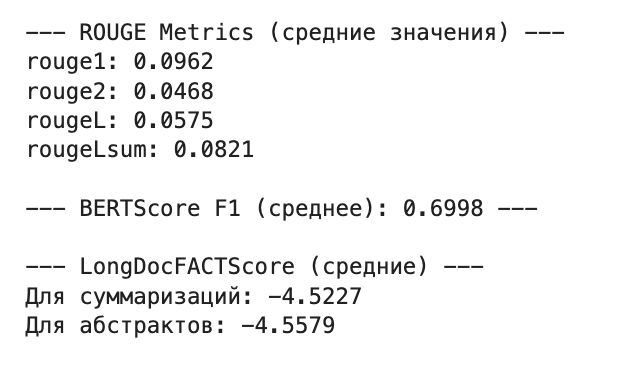

различия несущественные, но эти метрики все равно неинформативны